In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# EDA

### Loading the data

In [2]:
# specifying data types for the columns to maintain formatting from original data
data_types = {
    'hospital_service_area': object, 
    'hospital_county': object,
    'operating_certificate_number': object, 
    'permanent_facility_id': object,
    'facility_name': object, 
    'age_group': object, 
    'zip_code_3_digits': object, 
    'gender': object, 
    'race': object,
    'ethnicity': object, 
    'payment_typology_1': object, 
    'payment_typology_2': object,
    'payment_typology_3': object, 
    'length_of_stay': int
}

In [3]:
all_visits = pd.read_csv('../data/planned_deliveries.csv', dtype=data_types)
all_visits = all_visits.loc[:, all_visits.columns != 'Unnamed: 0']

In [4]:
all_visits_with_nans = all_visits

In [5]:
all_visits_with_nans

hospital_service_area hospital_county operating_certificate_number  \
0             New York City       Manhattan                      7002024   
1             New York City          Queens                      7003000   
2             New York City           Bronx                      7000008   
3             New York City           Kings                      7001009   
4             New York City       Manhattan                      7002009   
...                     ...             ...                          ...   
18799         New York City           Kings                      7001020   
18800         New York City           Bronx                      7000002   
18801         New York City       Manhattan                      7002024   
18802         New York City       Manhattan                      7002021   
18803           Long Island          Nassau                      7003004   

      permanent_facility_id                           facility_name age_group  \
0                    001456                    Mount Sinai Hospital  30 to 49   
1                    001626                Elmhurst Hospital Center  30 to 49   
2                    001172  Lincoln Medical & Mental Health Center  18 to 29   
3                    001294                   Coney Island Hospital  30 to 49   
4                    001445                  Harlem Hospital Center  18 to 29   
...                     ...                                     ...       ...   
18799                001305               Maimonides Medical Center  30 to 49   
18800                001186            North Central Bronx Hospital  30 to 49   
18801                001456                    Mount Sinai Hospital  30 to 49   
18802                001454            Metropolitan Hospital Center  30 to 49   
18803                001630       Long Island Jewish Medical Center  18 to 29   

      zip_code_3_digits gender                    race          ethnicity  \
0                   100      F              Other Race  Not Span/Hispanic   
1                   113      F              Other Race   Spanish/Hispanic   
2                   100      F              Other Race   Spanish/Hispanic   
3                   112      F              Other Race   Spanish/Hispanic   
4                   100      F  Black/African American  Not Span/Hispanic   
...                 ...    ...                     ...                ...   
18799               112      F                   White  Not Span/Hispanic   
18800               104      F              Other Race   Spanish/Hispanic   
18801               100      F                   White  Not Span/Hispanic   
18802               100      F              Other Race   Spanish/Hispanic   
18803               112      F                   White  Not Span/Hispanic   

             payment_typology_1 payment_typology_2 payment_typology_3  \
0      Private Health Insurance           Self-Pay                NaN   
1                      Medicaid                NaN                NaN   
2                      Medicaid                NaN                NaN   
3                      Medicaid                NaN                NaN   
4                      Medicaid                NaN                NaN   
...                         ...                ...                ...   
18799  Private Health Insurance           Medicaid           Self-Pay   
18800                  Medicaid                NaN                NaN   
18801  Private Health Insurance           Self-Pay                NaN   
18802                  Medicaid                NaN                NaN   
18803  Private Health Insurance           Medicaid           Self-Pay   

       length_of_stay  
0                   3  
1                   3  
2                   2  
3                   2  
4                   3  
...               ...  
18799               3  
18800               1  
18801               3  
18802               2  
18803               1  

[18804 rows x 14 columns]

In [8]:
rows, cols = all_visits.shape
print('This dataset has:')
print('Rows:', rows)
print('Cols:', cols)

This dataset has:
Rows: 18804
Cols: 14


### Exploring columns & their data types

In [9]:
all_visits.columns

Index(['hospital_service_area', 'hospital_county',
       'operating_certificate_number', 'permanent_facility_id',
       'facility_name', 'age_group', 'zip_code_3_digits', 'gender', 'race',
       'ethnicity', 'payment_typology_1', 'payment_typology_2',
       'payment_typology_3', 'length_of_stay'],
      dtype='object')

In [10]:
all_visits.dtypes

hospital_service_area           object
hospital_county                 object
operating_certificate_number    object
permanent_facility_id           object
facility_name                   object
age_group                       object
zip_code_3_digits               object
gender                          object
race                            object
ethnicity                       object
payment_typology_1              object
payment_typology_2              object
payment_typology_3              object
length_of_stay                   int32
dtype: object

### Exploring the target variable: length_of_stay

In [12]:
pd.value_counts(all_visits['length_of_stay']).reindex([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17])

length_of_stay
1     2755
2     9524
3     5039
4     1154
5      252
6       50
7       15
8        6
9        2
10       1
11       1
12       1
13       1
14       2
17       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Length of Stay for an On-Time Delivery')

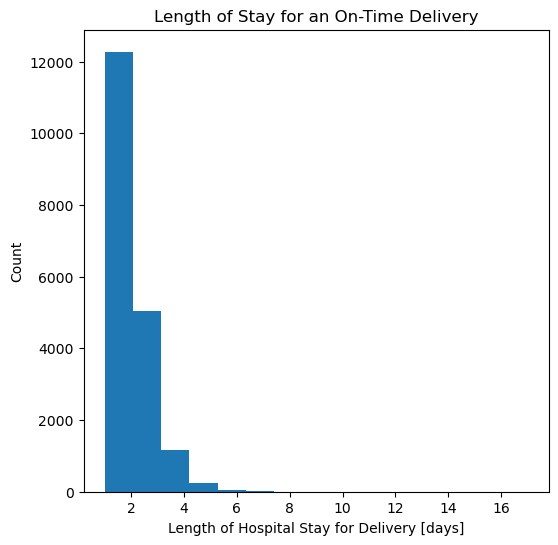

In [13]:
plt.figure(figsize=(6, 6))
all_visits['length_of_stay'].plot.hist(bins=all_visits['length_of_stay'].nunique())
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Count')
plt.title('Length of Stay for an On-Time Delivery')

Text(0.5, 1.0, 'Length of Stay for an On-Time Delivery')

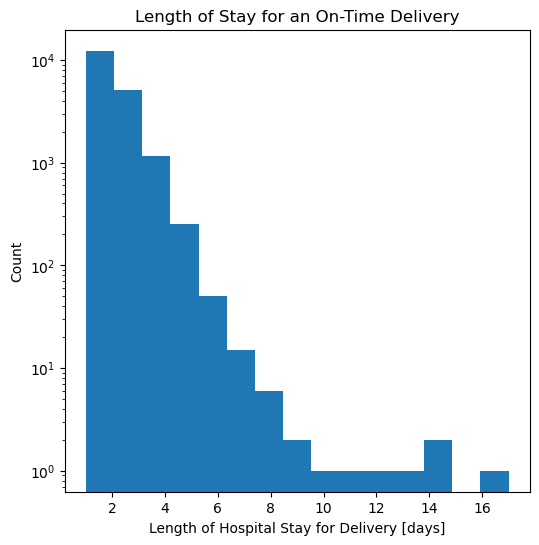

In [14]:
plt.figure(figsize=(6, 6))
all_visits['length_of_stay'].plot.hist(log=True, bins=all_visits['length_of_stay'].nunique())
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Count')
plt.title('Length of Stay for an On-Time Delivery')

### Looking at the basic properties of my missing values

In [15]:
print('Rows:', len(all_visits_with_nans))

Rows: 18804


In [16]:
print('Rows without missing values:', len(all_visits_with_nans.dropna(axis=0)))

Rows without missing values: 2101


In [17]:
all_visits_features_with_nans = all_visits_with_nans.loc[:, all_visits_with_nans.columns != 'length_of_stay']
print('Columns:', len(all_visits_features_with_nans.columns))

Columns: 13


In [18]:
full_cols = all_visits_features_with_nans.dropna(axis=1).columns
print('Columns without missing values:', len(full_cols))

Columns without missing values: 6


In [19]:
cols_with_missing = []
for col in all_visits_features_with_nans.columns:
    if (col not in full_cols):
        cols_with_missing.append(col)
        
print('Columns with missing values:')
print(cols_with_missing)

Columns with missing values:
['hospital_service_area', 'hospital_county', 'operating_certificate_number', 'permanent_facility_id', 'zip_code_3_digits', 'payment_typology_2', 'payment_typology_3']


#### Replacing missing values in categorical and ordinal features with a separate 'NOT REPORTED' category for EDA purposes

In [20]:
all_visits['payment_typology_2'].unique()

array(['Self-Pay', nan, 'Medicaid', 'Private Health Insurance',
       'Medicare', 'Blue Cross/Blue Shield', 'Managed Care, Unspecified',
       'Miscellaneous/Other', 'Federal/State/Local/VA'], dtype=object)

In [21]:
all_visits = all_visits.replace(to_replace=float('nan'), value='NOT REPORTED')

In [22]:
all_visits['payment_typology_2'].unique()

array(['Self-Pay', 'NOT REPORTED', 'Medicaid', 'Private Health Insurance',
       'Medicare', 'Blue Cross/Blue Shield', 'Managed Care, Unspecified',
       'Miscellaneous/Other', 'Federal/State/Local/VA'], dtype=object)

## Exploring the features

#### hospital_service_area

In [23]:
len(all_visits['hospital_service_area'].unique())

9

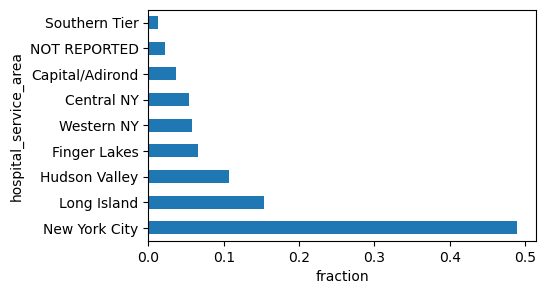

In [17]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['hospital_service_area'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

This makes sense knowing that NYC contains the largest percentage of the NY population.

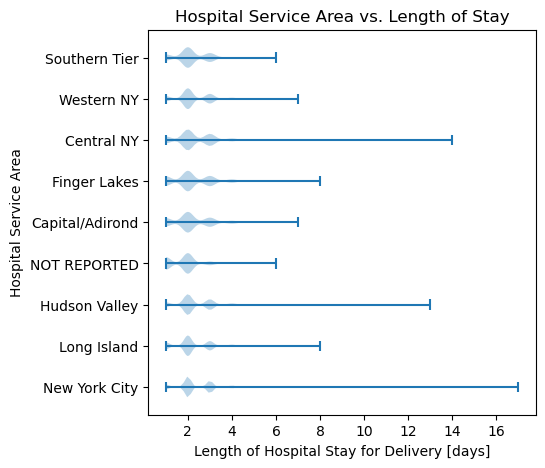

In [18]:
non_na = all_visits.dropna(subset='hospital_service_area')
labels = non_na['hospital_service_area'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['hospital_service_area']==unique]['length_of_stay'].values)
plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.ylabel('Hospital Service Area')
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.title('Hospital Service Area vs. Length of Stay')
plt.show()

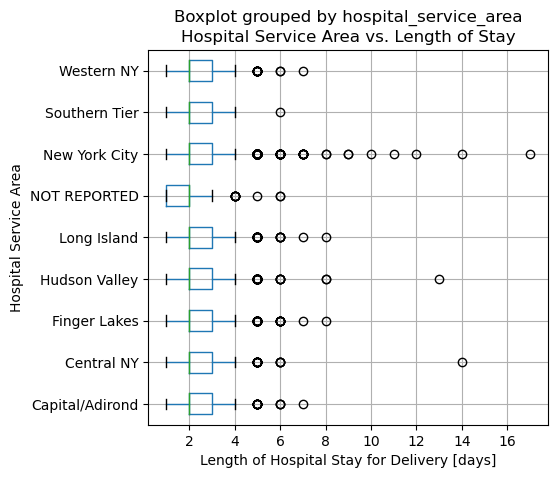

In [19]:
non_na = all_visits.dropna(subset='hospital_service_area')
non_na[['hospital_service_area', 'length_of_stay']].boxplot(by='hospital_service_area', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Hospital Service Area')
plt.title('Hospital Service Area vs. Length of Stay')
plt.show()

#### hospital_county

In [20]:
len(all_visits['hospital_county'].unique())

49

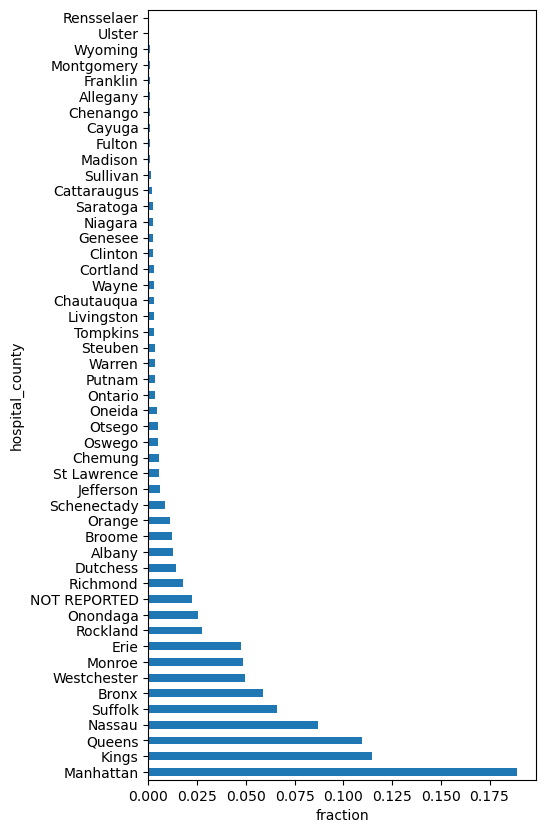

In [21]:
plt.figure(figsize=(5, 10))
pd.value_counts(all_visits['hospital_county'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

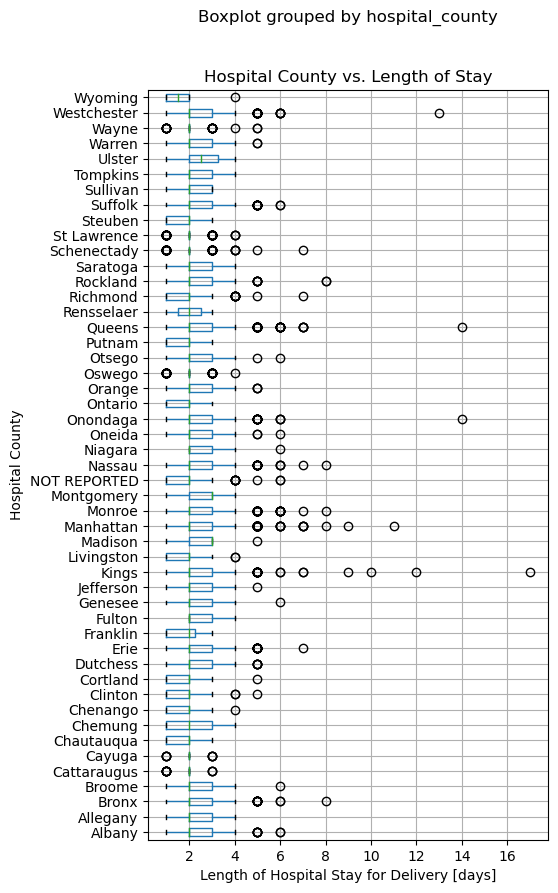

In [22]:
non_na = all_visits.dropna(subset='hospital_county')
non_na[['hospital_county', 'length_of_stay']].boxplot(by='hospital_county', vert=False, figsize=(5, 10))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Hospital County')
plt.title('Hospital County vs. Length of Stay')
plt.show()

#### operating_certificate_number

In [23]:
len(all_visits['operating_certificate_number'].unique())

112

In [24]:
# plt.figure(figsize=(5, 20))
# pd.value_counts(all_visits['operating_certificate_number'],normalize=True).plot.barh()
# plt.xlabel('fraction')
# plt.show()

#### permanent_facility_id

In [25]:
len(all_visits['permanent_facility_id'].unique())

121

In [26]:
# plt.figure(figsize=(5, 20))
# pd.value_counts(all_visits['permanent_facility_id'],normalize=True).plot.barh()
# plt.xlabel('fraction')
# plt.show()

#### facility_name

In [27]:
len(all_visits['facility_name'].unique())

121

In [28]:
# plt.figure(figsize=(5, 20))
# pd.value_counts(all_visits['facility_name'],normalize=True).plot.barh()
# plt.xlabel('fraction')
# plt.show()

#### age_group

In [29]:
age_group_correct_order = ['0 to 17', '18 to 29', '30 to 49', '50 to 69']

In [30]:
pd.value_counts(all_visits['age_group']).reindex(age_group_correct_order)

age_group
0 to 17       142
18 to 29     7915
30 to 49    10746
50 to 69        1
Name: count, dtype: int64

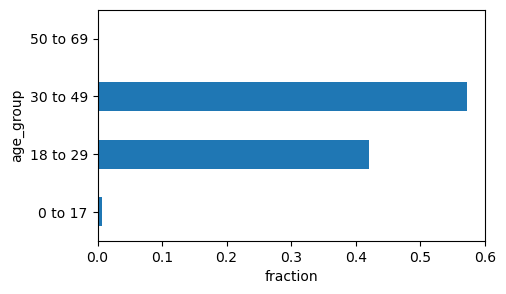

In [31]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['age_group'],normalize=True).reindex(age_group_correct_order).plot.barh()
plt.xlabel('fraction')
plt.show()

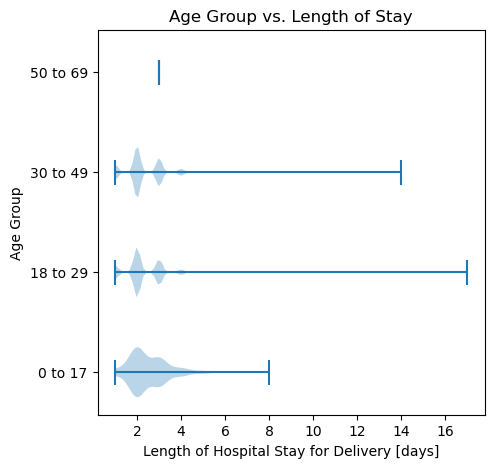

In [24]:
non_na = all_visits.dropna(subset='age_group')
labels = ['0 to 17', '18 to 29', '30 to 49', '50 to 69']
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['age_group']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Age Group')
plt.title('Age Group vs. Length of Stay')
plt.show()

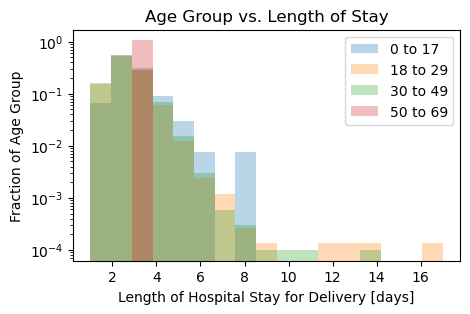

In [25]:
non_na = all_visits.dropna(subset='age_group')
categories = ['0 to 17', '18 to 29', '30 to 49', '50 to 69']
bin_range = (non_na['length_of_stay'].min(), non_na['length_of_stay'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(non_na[non_na['age_group']==c]['length_of_stay'],alpha=0.3,label=c,log=True, range=bin_range,bins=17,density=True)
plt.legend()
plt.ylabel('Fraction of Age Group')
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.title('Age Group vs. Length of Stay')
plt.show()

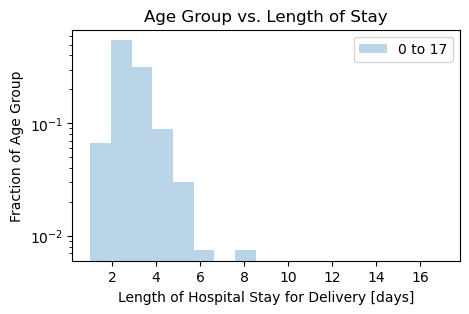

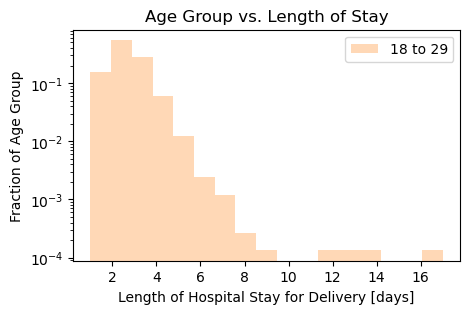

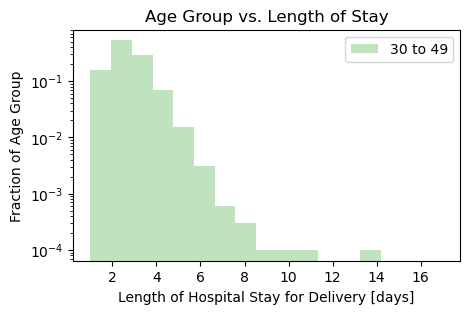

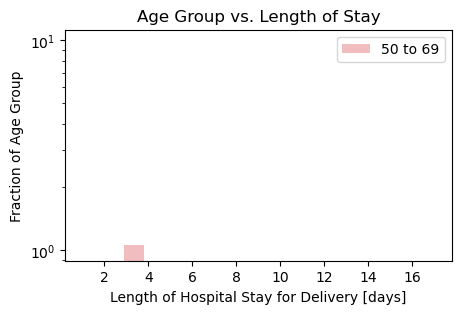

In [26]:
non_na = all_visits.dropna(subset='age_group')
categories = ['0 to 17', '18 to 29', '30 to 49', '50 to 69']
bin_range = (non_na['length_of_stay'].min(), non_na['length_of_stay'].max())

# unnecessary but I want to match the colors
i = 0
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for c in categories:
    plt.figure(figsize=(5,3))
    plt.hist(non_na[non_na['age_group']==c]['length_of_stay'],alpha=0.3,label=c,log=True, range=bin_range,bins=17,density=True, color=colors[i])
    plt.legend()
    plt.ylabel('Fraction of Age Group')
    plt.xlabel('Length of Hospital Stay for Delivery [days]')
    plt.title('Age Group vs. Length of Stay')
    plt.show()
    i+=1

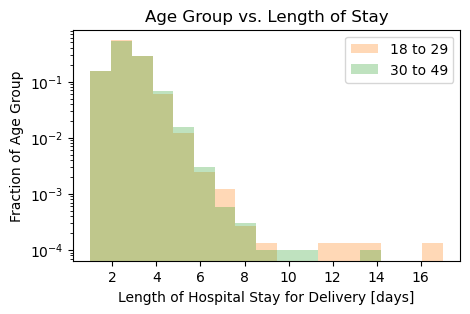

In [27]:
non_na = all_visits.dropna(subset='age_group')
categories = ['18 to 29', '30 to 49']
bin_range = (non_na['length_of_stay'].min(), non_na['length_of_stay'].max())

# unnecessary but I want to match the colors
i = 0
colors = ['#ff7f0e', '#2ca02c']
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(non_na[non_na['age_group']==c]['length_of_stay'],alpha=0.3,label=c,log=True, range=bin_range,bins=17,density=True, color=colors[i])
    i+=1
plt.legend()
plt.ylabel('Fraction of Age Group')
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.title('Age Group vs. Length of Stay')
plt.show()


#### zip_code_3_digits

In [28]:
len(all_visits['zip_code_3_digits'].unique())

51

#### gender

In [30]:
pd.value_counts(all_visits['gender'])

gender
F    18785
M       18
U        1
Name: count, dtype: int64

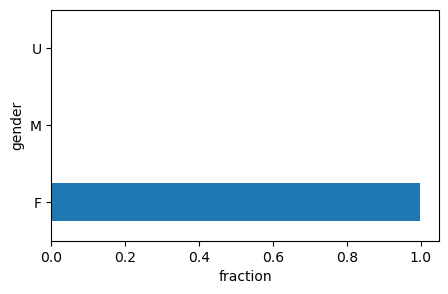

In [31]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['gender'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

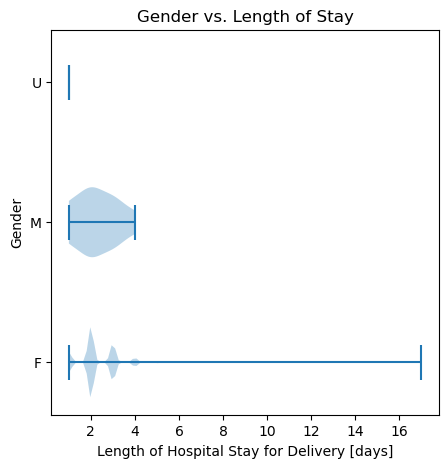

In [32]:
non_na = all_visits.dropna(subset='gender')
labels = all_visits['gender'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['gender']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Gender')
plt.title('Gender vs. Length of Stay')
plt.show()

In [33]:
#all_visits[all_visits['gender']=='M']

#### race

In [34]:
len(all_visits['race'].unique())

4

In [35]:
pd.value_counts(all_visits['race'])

race
White                     9878
Other Race                6507
Black/African American    2186
Multi-racial               233
Name: count, dtype: int64

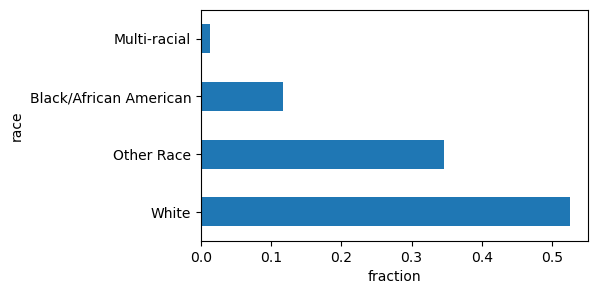

In [36]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['race'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

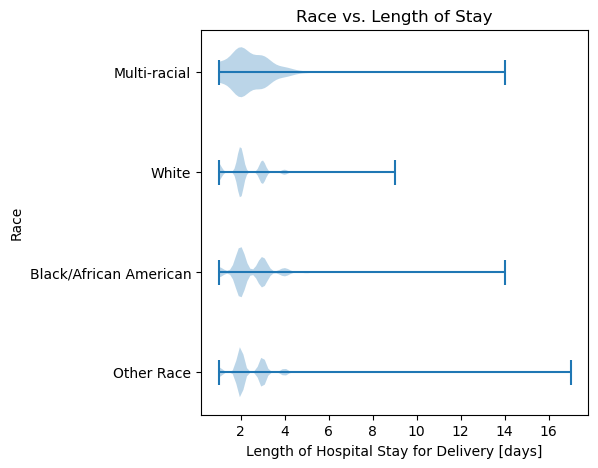

In [37]:
non_na = all_visits.dropna(subset='race')
labels = all_visits['race'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['race']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Race')
plt.title('Race vs. Length of Stay')
plt.show()

In [38]:
all_visits[all_visits['race']=='Multi-racial']['length_of_stay'].unique()

array([ 1,  3,  2,  4,  6, 14,  5])

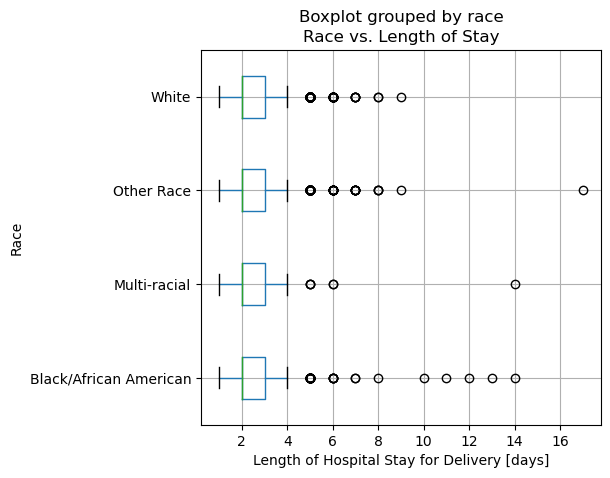

In [39]:
non_na = all_visits.dropna(subset='race')
non_na[['race', 'length_of_stay']].boxplot(by='race', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Race')
plt.title('Race vs. Length of Stay')
plt.show()

#### ethnicity

In [40]:
len(all_visits['ethnicity'].unique())

4

In [41]:
pd.value_counts(all_visits['ethnicity'])

ethnicity
Not Span/Hispanic    13621
Spanish/Hispanic      3507
Unknown               1655
Multi-ethnic            21
Name: count, dtype: int64

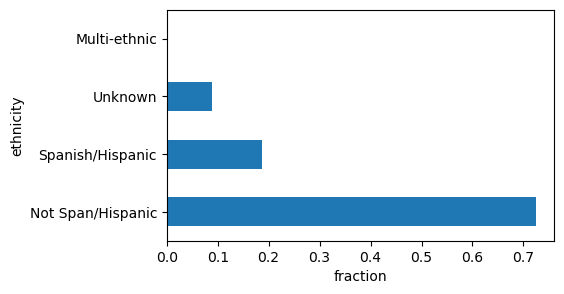

In [42]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['ethnicity'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

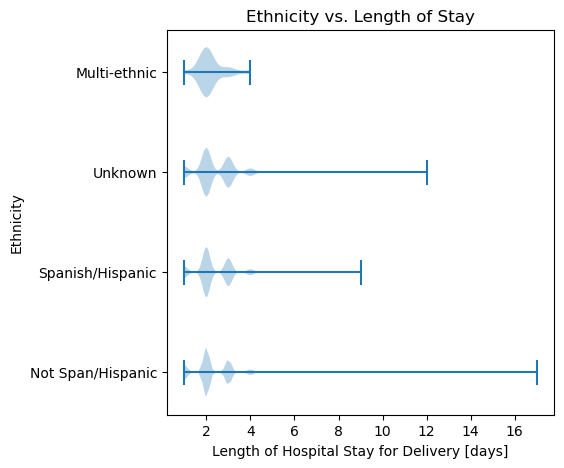

In [43]:
non_na = all_visits.dropna(subset='ethnicity')
labels = all_visits['ethnicity'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['ethnicity']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Ethnicity')
plt.title('Ethnicity vs. Length of Stay')
plt.show()

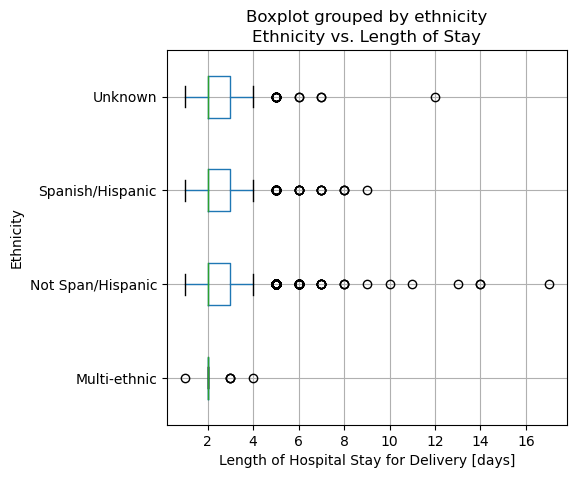

In [44]:
non_na = all_visits.dropna(subset='ethnicity')
non_na[['ethnicity', 'length_of_stay']].boxplot(by='ethnicity', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Ethnicity')
plt.title('Ethnicity vs. Length of Stay')
plt.show()

#### payment_typology_1

In [45]:
all_visits['payment_typology_1'].value_counts()

payment_typology_1
Medicaid                     8728
Private Health Insurance     5428
Blue Cross/Blue Shield       3890
Managed Care, Unspecified     368
Federal/State/Local/VA        165
Medicare                      111
Self-Pay                       76
Miscellaneous/Other            38
Name: count, dtype: int64

In [46]:
all_visits['payment_typology_1'].loc[all_visits['length_of_stay'] == 1].value_counts()

payment_typology_1
Medicaid                     1285
Private Health Insurance      740
Blue Cross/Blue Shield        604
Managed Care, Unspecified      46
Federal/State/Local/VA         33
Self-Pay                       22
Medicare                       18
Miscellaneous/Other             7
Name: count, dtype: int64

In [47]:
print(len(all_visits.loc[all_visits['payment_typology_1'] == 'Self-Pay']))
all_visits.loc[all_visits['payment_typology_1'] == 'Self-Pay']['length_of_stay'].value_counts()

76


length_of_stay
2    30
1    22
3    17
4     4
5     3
Name: count, dtype: int64

In [48]:
print(len(all_visits.loc[all_visits['payment_typology_1'] == 'Medicaid']))
all_visits.loc[all_visits['payment_typology_1'] == 'Medicaid']['length_of_stay'].value_counts()

8728


length_of_stay
2     4566
3     2230
1     1285
4      506
5      105
6       15
7       12
8        5
14       1
9        1
17       1
13       1
Name: count, dtype: int64

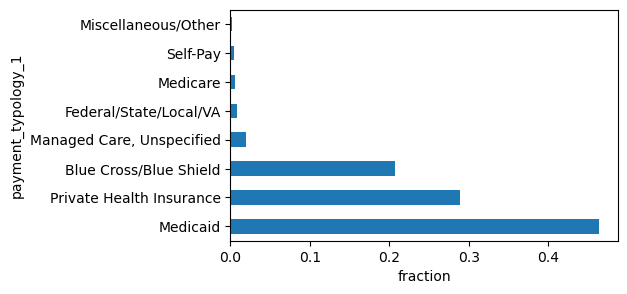

In [49]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['payment_typology_1'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

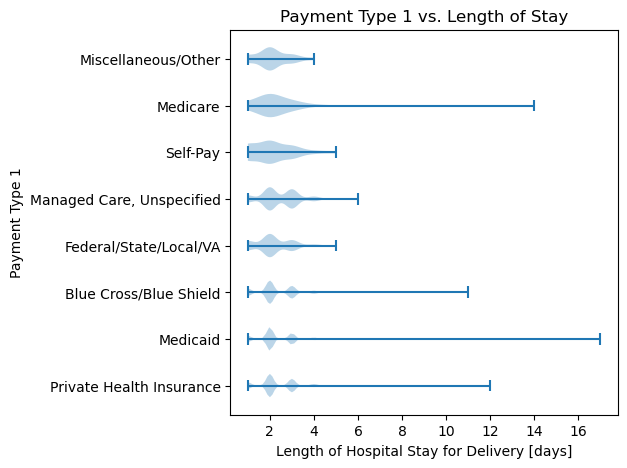

In [50]:
non_na = all_visits.dropna(subset='payment_typology_1')
labels = all_visits['payment_typology_1'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['payment_typology_1']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 1')
plt.title('Payment Type 1 vs. Length of Stay')
plt.show()

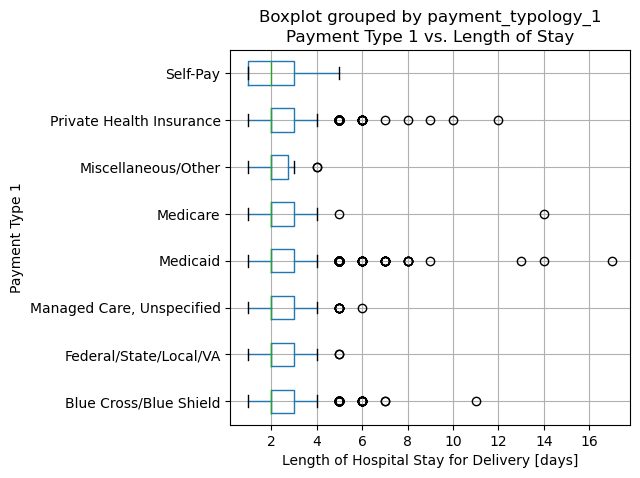

In [51]:
non_na = all_visits.dropna(subset='payment_typology_1')
non_na[['payment_typology_1', 'length_of_stay']].boxplot(by='payment_typology_1', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 1')
plt.title('Payment Type 1 vs. Length of Stay')
plt.show()

#### payment_typology_2

In [52]:
len(all_visits['payment_typology_2'].unique())

9

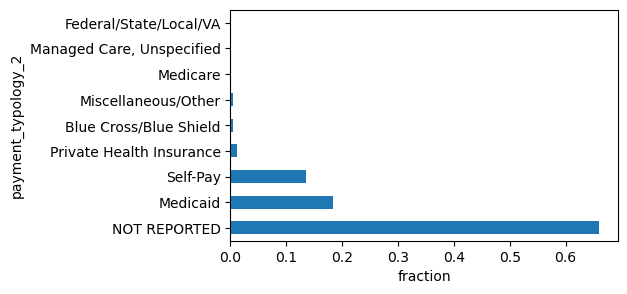

In [53]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['payment_typology_2'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

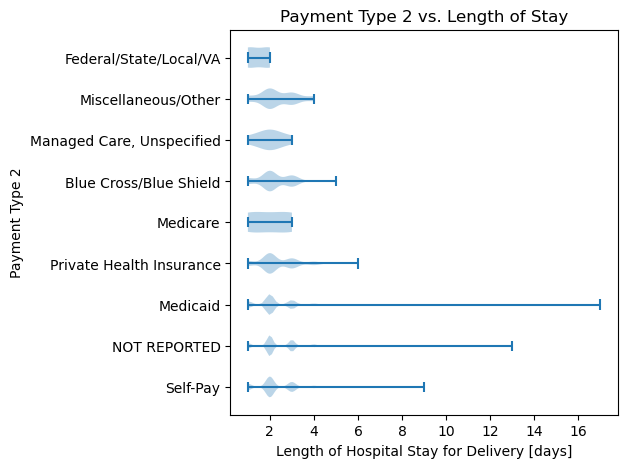

In [54]:
non_na = all_visits.dropna(subset='payment_typology_2')
labels = non_na['payment_typology_2'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['payment_typology_2']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 2')
plt.title('Payment Type 2 vs. Length of Stay')
plt.show()

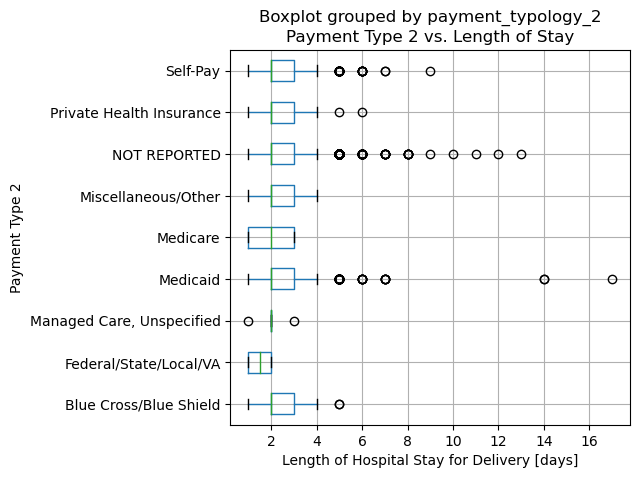

In [55]:
non_na = all_visits.dropna(subset='payment_typology_2')
non_na[['payment_typology_2', 'length_of_stay']].boxplot(by='payment_typology_2', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 2')
plt.title('Payment Type 2 vs. Length of Stay')
plt.show()

#### payment_typology_3

In [56]:
len(all_visits['payment_typology_3'].unique())

6

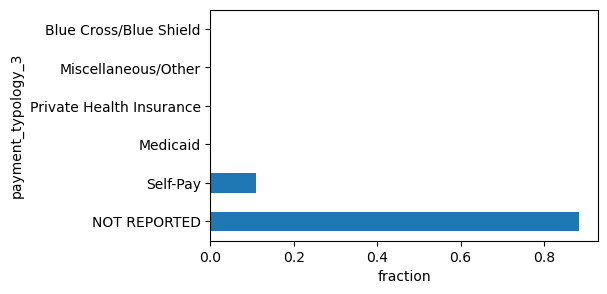

In [57]:
plt.figure(figsize=(5,3))
pd.value_counts(all_visits['payment_typology_3'],normalize=True).plot.barh()
plt.xlabel('fraction')
plt.show()

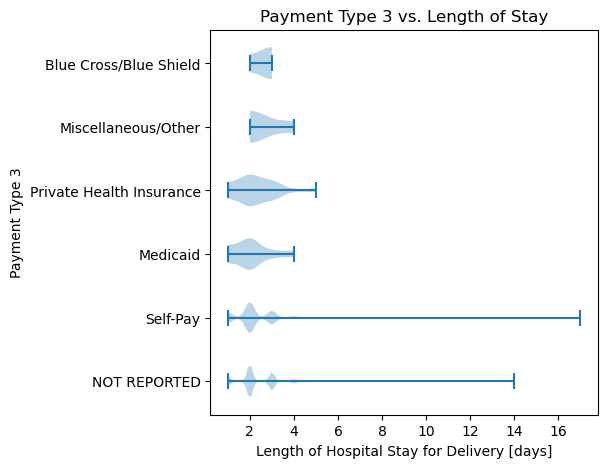

In [58]:
non_na = all_visits.dropna(subset='payment_typology_3')
labels = non_na['payment_typology_3'].unique()
dataset = []
for unique in labels:
    dataset.append(non_na[non_na['payment_typology_3']==unique]['length_of_stay'].values)

plt.figure(figsize=(5, 5))
plt.violinplot(dataset=dataset, vert=False)
plt.yticks(np.arange(1, len(labels)+1, 1), labels)
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 3')
plt.title('Payment Type 3 vs. Length of Stay')
plt.show()

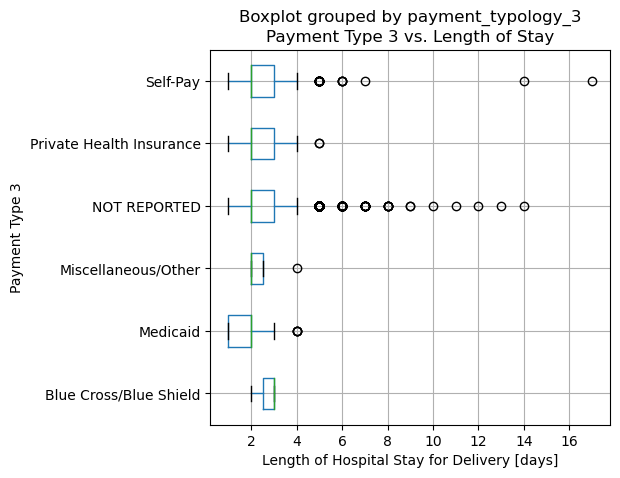

In [59]:
non_na = all_visits.dropna(subset='payment_typology_3')
non_na[['payment_typology_3', 'length_of_stay']].boxplot(by='payment_typology_3', vert=False, figsize=(5, 5))
plt.xlabel('Length of Hospital Stay for Delivery [days]')
plt.ylabel('Payment Type 3')
plt.title('Payment Type 3 vs. Length of Stay')
plt.show()

## Correlations Between Features

In [62]:
# corr_matrix = all_visits_with_nans.loc[:, all_visits_with_nans.columns != 'length_of_stay'].corr(method='pearson')

# plt.figure(figsize=(5, 5))
# plt.imshow(corr_matrix, origin='lower', vmin=-1, vmax=1)
# plt.xlabel('Features')
# plt.ylabel('Features')
# plt.title('Pearson Correlation Between Features')
# plt.xticks(ticks=range(0, len(corr_matrix.columns)), labels=corr_matrix.columns)
# plt.yticks(ticks=range(0, len(corr_matrix.columns)), labels=corr_matrix.columns)
# plt.colorbar(label='Pearson (Standard) Correlation Coefficient')
# plt.show()

In [17]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
from math import ceil
import pickle

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import ParameterGrid

In [18]:
y = all_visits['length_of_stay']
X = all_visits.loc[:, all_visits.columns != 'length_of_stay']

In [19]:
def unique_non_nans(X, ftr):
    '''
    Determines the unique, non-nan values of a certain feature in a feature matrix.
    Does not error check that ftr is in fact a column in X; this is the responsibility of the caller.
    
    - X: a 2D DataFrame feature matrix containing the feature of interest as a column
    - ftr: a string, the name of the feature to explore in X
    
    Returns:
    - (unique_vals_nonull) a list of the unique, non-null values of ftr in X, replacing a nan value with 'not reported'
    '''
    unique_vals = X[ftr].unique()
    unique_vals_nonull = ['not reported' if isinstance(x, float) and np.isnan(x) else x for x in unique_vals]

    return unique_vals_nonull    

In [20]:
random_state = 42

# categorizing the columns in my dataset by how they should be encoded
onehot_ftrs = ['hospital_service_area', 'hospital_county', 'operating_certificate_number', 'permanent_facility_id', \
               'facility_name', 'zip_code_3_digits', 'gender', 'race', 'ethnicity', 'payment_typology_1', \
               'payment_typology_2', 'payment_typology_3']
onehot_cats = [unique_non_nans(X, ftr) for ftr in onehot_ftrs]
ordinal_ftrs = ['age_group']
ordinal_cats = [['0 to 17', '18 to 29', '30 to 49', '50 to 69', '70 or Older']]

# replace missing values in categorical columns with 'not reported'
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not reported')),
    ('onehot', OneHotEncoder(categories=onehot_cats, sparse=False, handle_unknown='ignore'))])

# my data has no missing values in its ordinal column, so only encoding is necessary
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),
        ('ordinal', ordinal_transformer, ordinal_ftrs)])

In [29]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=48)

# preprocess
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)
prep_1_ftrs = preprocessor.get_feature_names_out()
X_train_prep = pd.DataFrame(X_train_prep, columns=prep_1_ftrs)
X_test_prep = pd.DataFrame(X_test_prep, columns=prep_1_ftrs)

# final preprocess with Standard Scaler so that I can use the coefficients of linear models as global importance metrics
standard_scaler_transformer = Pipeline(steps=[
    ('std', StandardScaler())])
final_preprocessor = ColumnTransformer(
    transformers=[('std', standard_scaler_transformer, preprocessor.get_feature_names_out())])

X_train_prep = final_preprocessor.fit_transform(X_train_prep)
X_test_prep = final_preprocessor.transform(X_test_prep)
prep_ftrs = final_preprocessor.get_feature_names_out()

C:\Users\truth\miniconda3\envs\data1030project\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


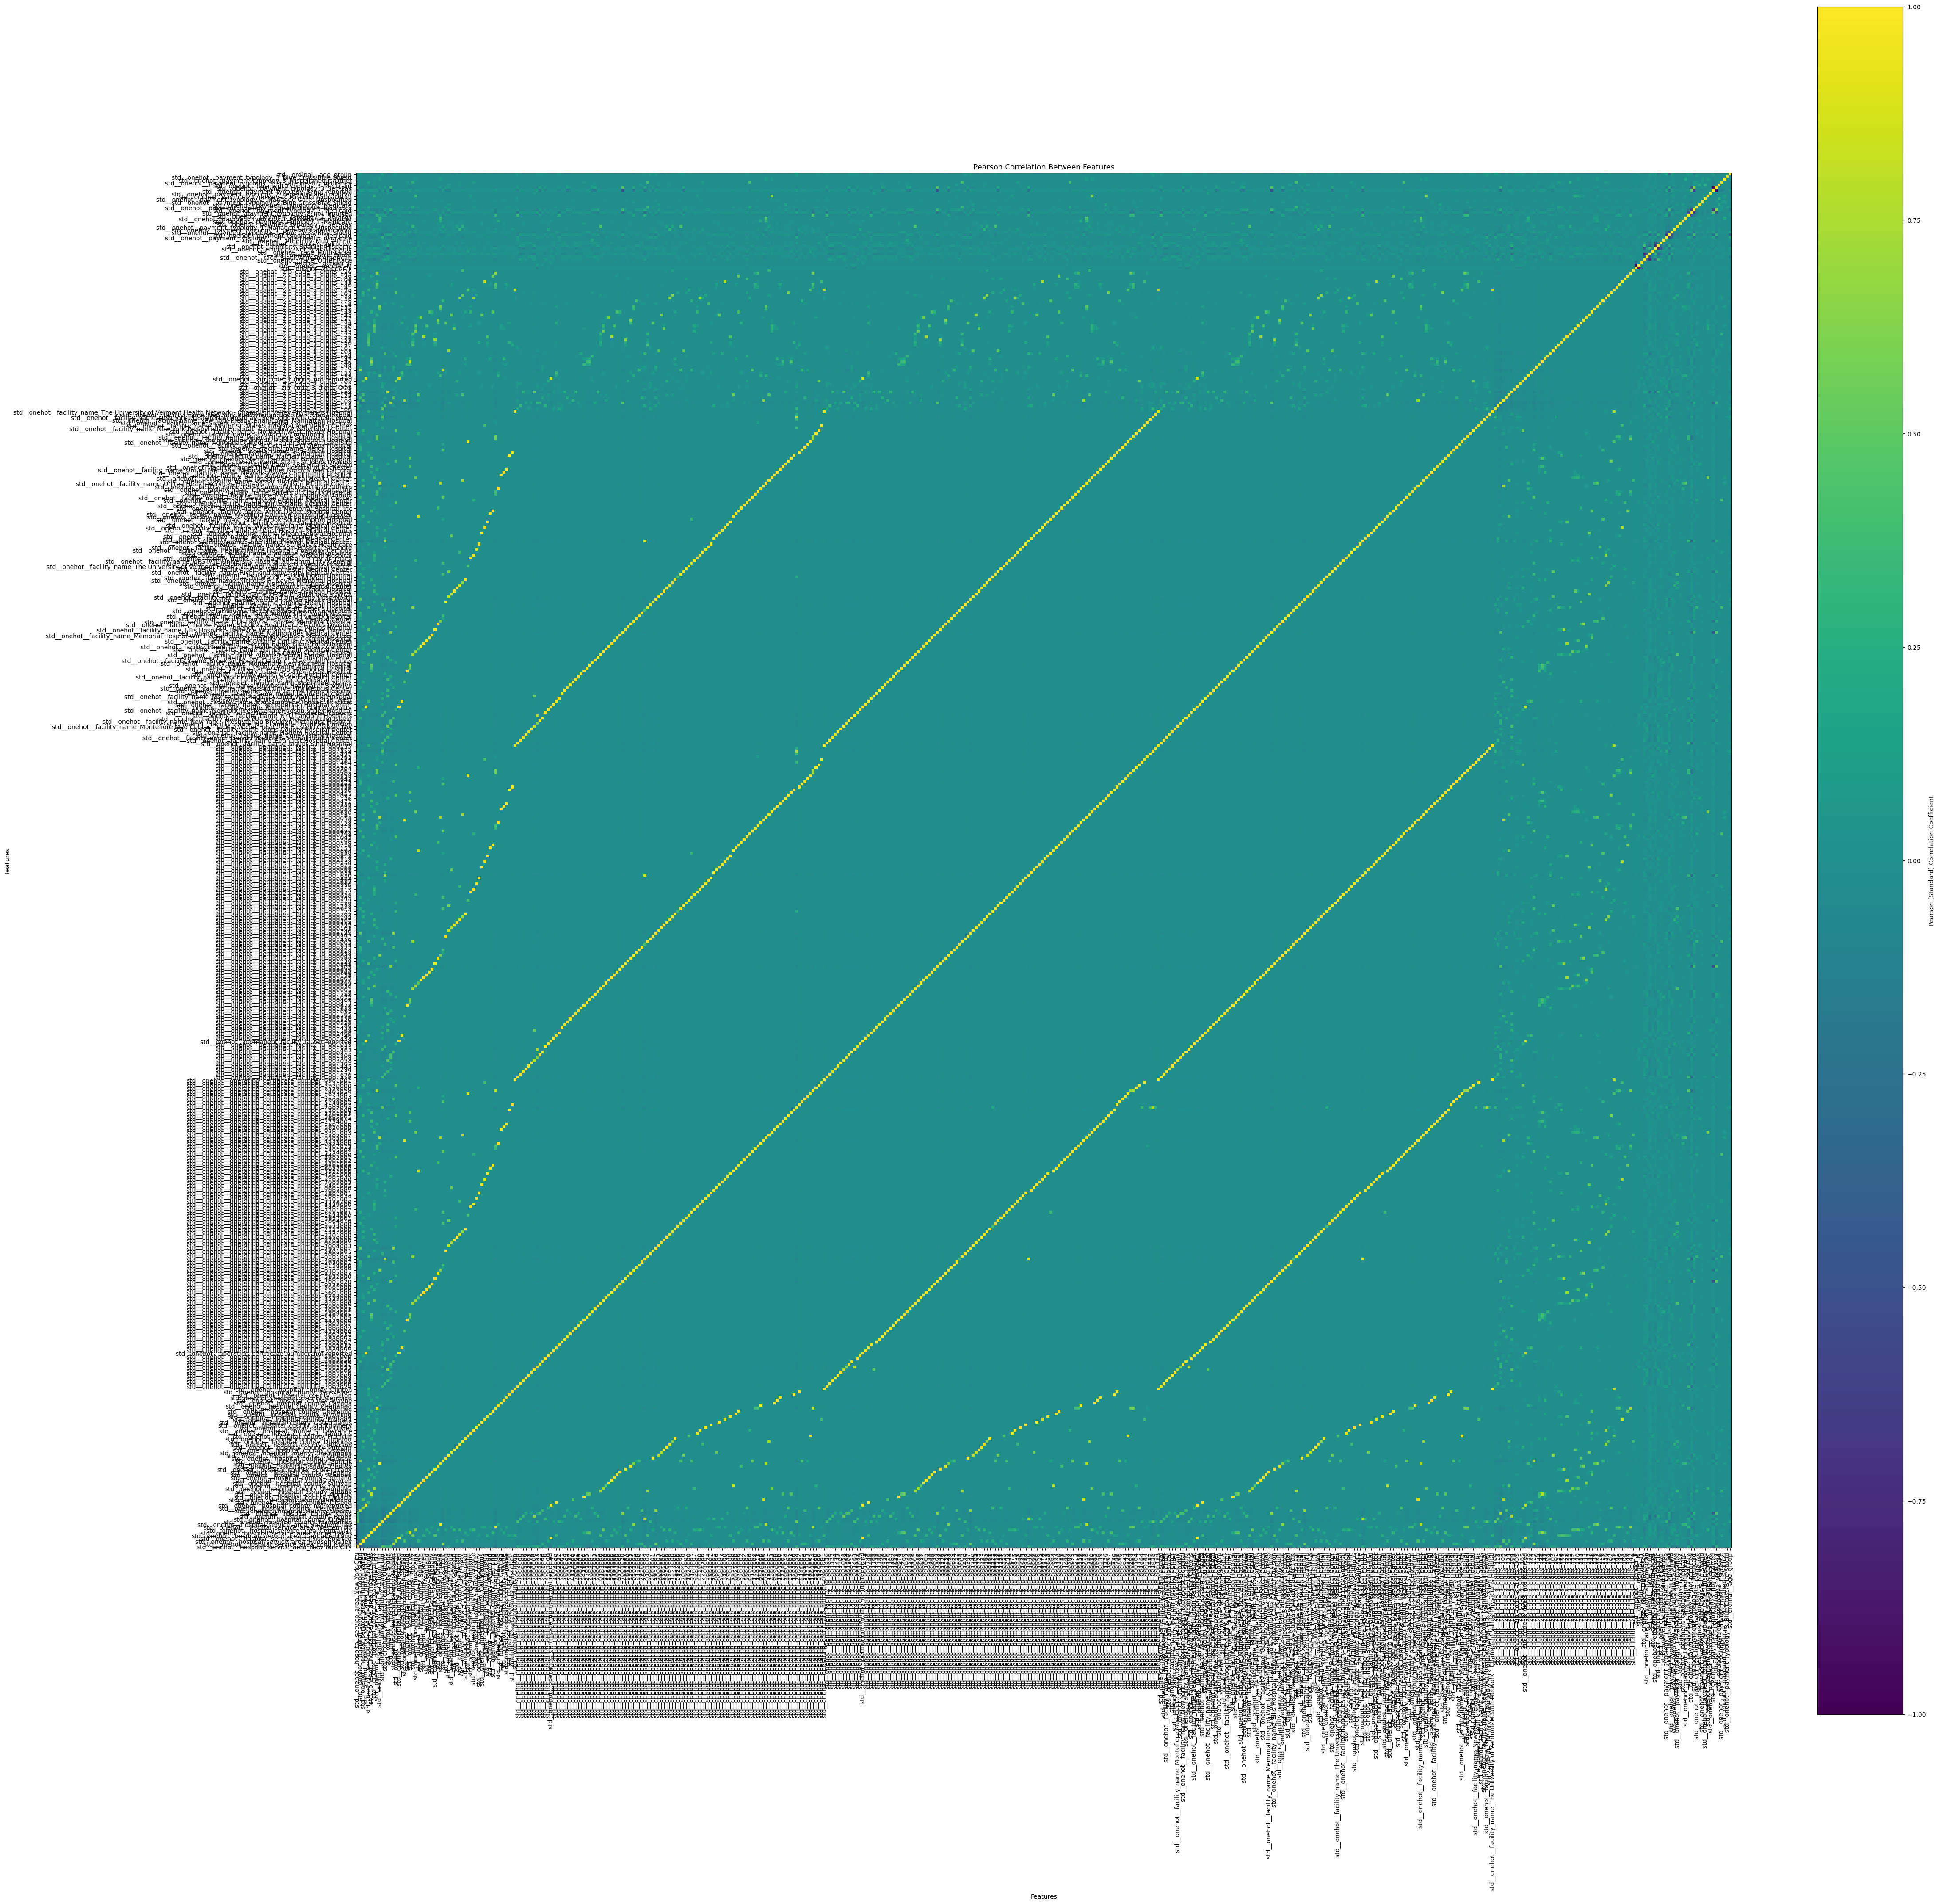

In [31]:
corr_matrix = pd.DataFrame(X_test_prep, columns=prep_ftrs).corr(method='pearson')
        
plt.figure(figsize=(50, 50))
plt.imshow(corr_matrix, origin='lower', vmin=-1, vmax=1)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Pearson Correlation Between Features')
plt.xticks(ticks=range(0, len(corr_matrix.columns)), labels=corr_matrix.columns, rotation='vertical')
plt.yticks(ticks=range(0, len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.colorbar(label='Pearson (Standard) Correlation Coefficient')
plt.show()

In [32]:
corr_matrix = pd.DataFrame(X_test_prep, columns=prep_ftrs).corr(method='pearson')

In [40]:
len(prep_ftrs)

498

In [41]:
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
high_pos_correlation = sorted_pairs[sorted_pairs > 0.97]
high_neg_correlation = sorted_pairs[sorted_pairs < -0.97]

In [42]:
high_pos_correlation

std__onehot__hospital_county_Broome                      std__onehot__hospital_service_area_Southern Tier           0.978458
std__onehot__hospital_service_area_Southern Tier         std__onehot__hospital_county_Broome                        0.978458
std__onehot__operating_certificate_number_1401013        std__onehot__permanent_facility_id_000218                  0.992661
                                                         std__onehot__facility_name_Sisters of Charity Hospital     0.992661
std__onehot__facility_name_Sisters of Charity Hospital   std__onehot__operating_certificate_number_1401013          0.992661
                                                                                                                      ...   
std__ordinal__age_group                                  std__ordinal__age_group                                    1.000000
std__onehot__operating_certificate_number_7000024        std__onehot__permanent_facility_id_001186                  1.000000


In [43]:
high_pos_correlation = sorted_pairs[(sorted_pairs > 0.97) & (sorted_pairs.index.get_level_values(0) != sorted_pairs.index.get_level_values(1))]

In [45]:
high_pos_correlation.to_csv('./high_correlations.csv')

In [38]:
high_neg_correlation

std__onehot__payment_typology_3_Self-Pay      std__onehot__payment_typology_3_not reported   -0.977782
std__onehot__payment_typology_3_not reported  std__onehot__payment_typology_3_Self-Pay       -0.977782
dtype: float64